In [1]:
library(tidyverse)
library(repr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [63]:
heart_data <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data",col_name = FALSE)
colnames(heart_data) <- c("age", "sex", "chest_pain", "resting_bp(mmHg)", "cholesterol(mg/dL)", "fbs>120mg/dL", "restingecg", "max_heart_rate", "exercise_induced_angina", "oldpeak", "slope", "ca", "thal", "num")

heart_data
                       

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X5, X6, X7, X8, X9, X11, X12, X13
dbl (5): X1, X2, X3, X10, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,chest_pain,resting_bp(mmHg),cholesterol(mg/dL),fbs>120mg/dL,restingecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
28,1,2,130,132,0,2,185,0,0,?,?,?,0
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
30,0,1,170,237,0,1,170,0,0,?,?,6,0
31,0,2,100,219,0,1,150,0,0,?,?,?,0
32,0,2,105,198,0,0,165,0,0,?,?,?,0
32,1,2,110,225,0,0,184,0,0,?,?,?,0
32,1,2,125,254,0,0,155,0,0,?,?,?,0
33,1,3,120,298,0,0,185,0,0,?,?,?,0


In [87]:
heart_data_tidy <- heart_data |> select(chest_pain, restingecg, max_heart_rate, num) |>
                   filter(chest_pain!= "?", restingecg!= "?", max_heart_rate!= "?", num!= "?") |>
                   mutate(chest_pain = as_factor(chest_pain), 
                          restingecg = as_factor(restingecg),
                          max_heart_rate = as.numeric(max_heart_rate),
                          num = as_factor(num))
heart_data_tidy

heart_data_miss_data_num <- heart_data_tidy|>
                        map_df(is.na)|>
                        map_df(sum)
heart_data_miss_data_num

heart_data_obs_num <- heart_data_tidy|>
     summarize(n_chest_pain = sum(!is.na(chest_pain)),
               n_restingecg = sum(!is.na(restingecg)),
               n_max_heart_rate = sum(!is.na(max_heart_rate)),
               n_num = sum(!is.na(num)))
heart_data_obs_num

heart_data_max_heart_rate_mean <- heart_data_tidy|>
                                  summarize(mean.mhr=mean(max_heart_rate, na.rm=TRUE))
heart_data_max_heart_rate_mean

chest_pain,restingecg,max_heart_rate,num
<fct>,<fct>,<dbl>,<fct>
2,2,185,0
2,0,160,0
2,0,170,0
1,1,170,0
2,1,150,0
2,0,165,0
2,0,184,0
2,0,155,0
3,0,185,0


chest_pain,restingecg,max_heart_rate,num
<int>,<int>,<int>,<int>
0,0,0,0


n_chest_pain,n_restingecg,n_max_heart_rate,n_num
<int>,<int>,<int>,<int>
292,292,292,292


mean.mhr
<dbl>
139.1404


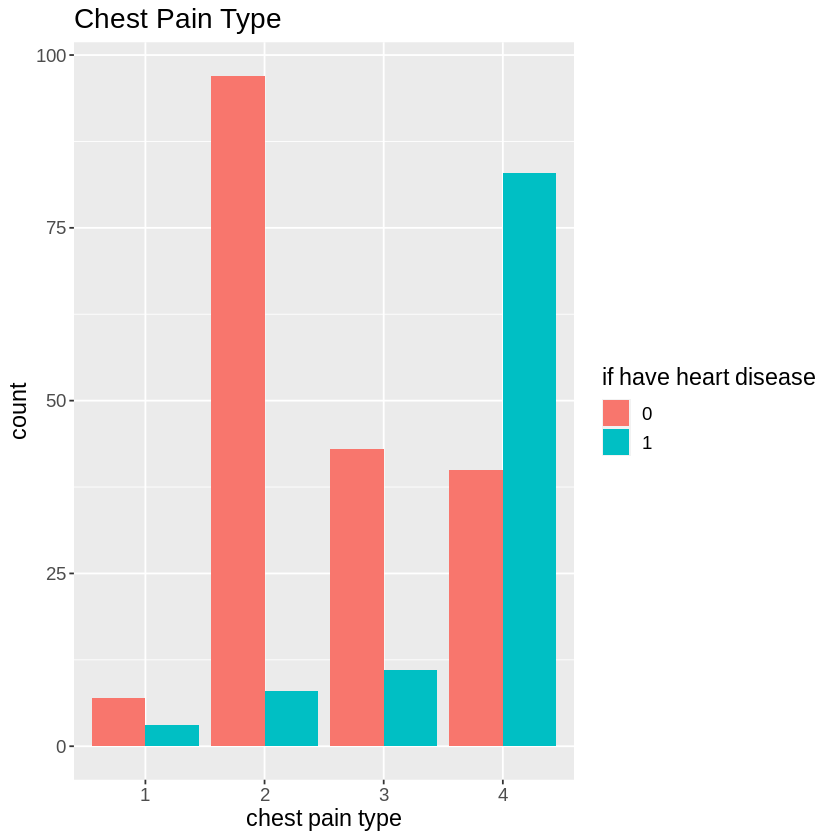

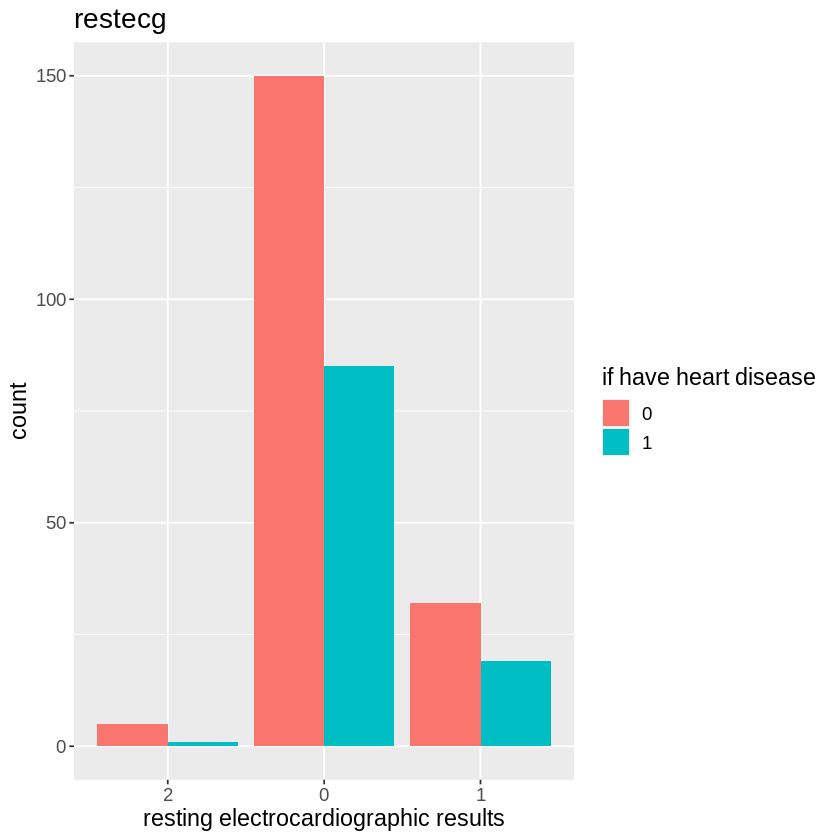

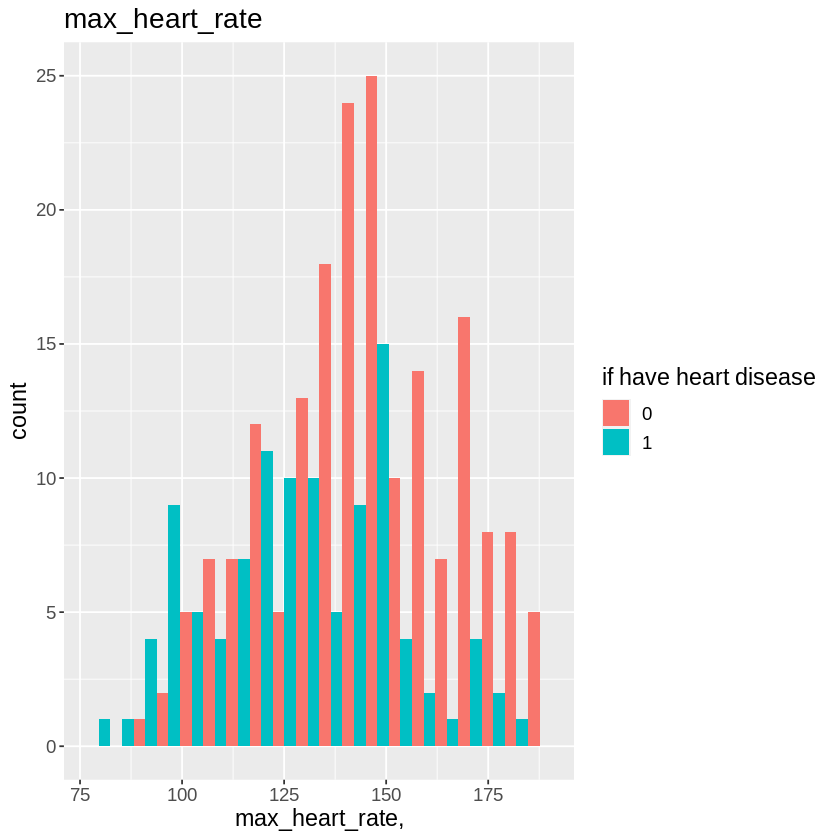

In [88]:
chest_pain_plot <- ggplot(heart_data_tidy , 
                   aes(x = chest_pain, fill = num)) +
                   geom_bar(position= "dodge") +
                   labs(x = "chest pain type", y = "count",  fill = "if have heart disease") +
                   ggtitle("Chest Pain Type") +
                   theme(text = element_text(size = 14))

chest_pain_plot

restingecg_plot <- ggplot(heart_data_tidy , 
                   aes(x = restingecg, fill = num)) +
                   geom_bar(position= "dodge") +
                   labs(x = "resting electrocardiographic results", y = "count",  fill = "if have heart disease") +
                   ggtitle("restecg") +
                   theme(text = element_text(size = 14))
restingecg_plot

max_heart_rate_plot <- ggplot(heart_data_tidy , 
                   aes(x = max_heart_rate, fill = num)) +
                   geom_histogram(position= "dodge", bins=20) +
                   labs(x = "max_heart_rate,", y = "count",  fill = "if have heart disease") +
                   ggtitle("max_heart_rate") +
                   theme(text = element_text(size = 14))
max_heart_rate_plot
